In [1]:
!pip install kagglehub[pandas-datasets]
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter

from sklearn.metrics import mean_squared_error

In [2]:
# Download latest version
path = kagglehub.dataset_download("orvile/airline-market-fare-prediction-data")

# Set the path to the file you'd like to load
file_path = "Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "orvile/airline-market-fare-prediction-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-2-1758971769.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
print("First 5 records:")
df.head()

First 5 records:


,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,0.000132
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132


In [4]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581278 entries, 0 to 1581277
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MktCoupons               1581278 non-null  int64  
 1   OriginCityMarketID       1581278 non-null  int64  
 2   DestCityMarketID         1581278 non-null  int64  
 3   OriginAirportID          1581278 non-null  int64  
 4   DestAirportID            1581278 non-null  int64  
 5   Carrier                  1581278 non-null  int64  
 6   NonStopMiles             1581278 non-null  float64
 7   RoundTrip                1581278 non-null  float64
 8   ODPairID                 1581278 non-null  int64  
 9   Pax                      1581278 non-null  float64
 10  CarrierPax               1581278 non-null  float64
 11  Average_Fare             1581278 non-null  float64
 12  Market_share             1581278 non-null  float64
 13  Market_HHI               1581278 non-null 

In [5]:
# Generate summary statistics
df.describe()

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
count,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,...,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06
mean,1.179463e+00,1.081836e+02,1.088161e+02,1.483760e+02,1.492537e+02,1.277755e+01,1.183158e+03,8.052215e-01,2.488494e+03,1.773202e+05,...,1.026428e+00,1.213386e-01,8.220598e-01,1.213717e+03,2.654614e-02,2.652975e-02,1.657893e-02,1.658640e-02,1.527605e-01,7.775990e-04
std,3.876878e-01,6.779829e+01,6.824662e+01,7.974261e+01,8.006476e+01,7.785476e+00,7.136535e+02,3.960302e-01,1.401771e+03,2.380289e+05,...,1.091917e-01,3.265204e-01,3.824626e-01,7.268271e+02,1.934480e-02,1.924849e-02,1.008668e-02,1.007899e-02,1.119035e-01,9.117999e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.020000e+02,4.426799e-06,2.529599e-06,4.426799e-06,2.529599e-06,3.958823e-04,6.323999e-07
25%,1.000000e+00,4.800000e+01,4.800000e+01,7.300000e+01,7.400000e+01,4.000000e+00,6.430000e+02,1.000000e+00,1.349000e+03,3.182400e+04,...,1.000000e+00,0.000000e+00,1.000000e+00,6.580258e+02,1.037452e-02,1.050922e-02,8.544355e-03,8.631626e-03,5.086329e-02,2.093244e-04
50%,1.000000e+00,1.070000e+02,1.080000e+02,1.500000e+02,1.510000e+02,1.500000e+01,1.011000e+03,1.000000e+00,2.598000e+03,8.654300e+04,...,1.000000e+00,0.000000e+00,1.000000e+00,1.040641e+03,2.645202e-02,2.620602e-02,1.636777e-02,1.672128e-02,1.168264e-01,4.648139e-04
75%,1.000000e+00,1.580000e+02,1.590000e+02,2.130000e+02,2.140000e+02,2.000000e+01,1.590000e+03,1.000000e+00,3.493000e+03,2.318210e+05,...,1.000000e+00,0.000000e+00,1.000000e+00,1.639106e+03,3.978681e-02,3.978301e-02,2.324512e-02,2.335263e-02,3.076512e-01,1.035239e-03
max,3.000000e+00,2.660000e+02,2.670000e+02,2.900000e+02,2.910000e+02,2.400000e+01,5.095000e+03,1.000000e+00,5.354000e+03,1.495396e+06,...,2.985825e+00,1.000000e+00,1.000000e+00,5.096521e+03,6.692372e-02,6.629195e-02,3.630165e-02,3.597090e-02,3.076512e-01,5.302673e-03


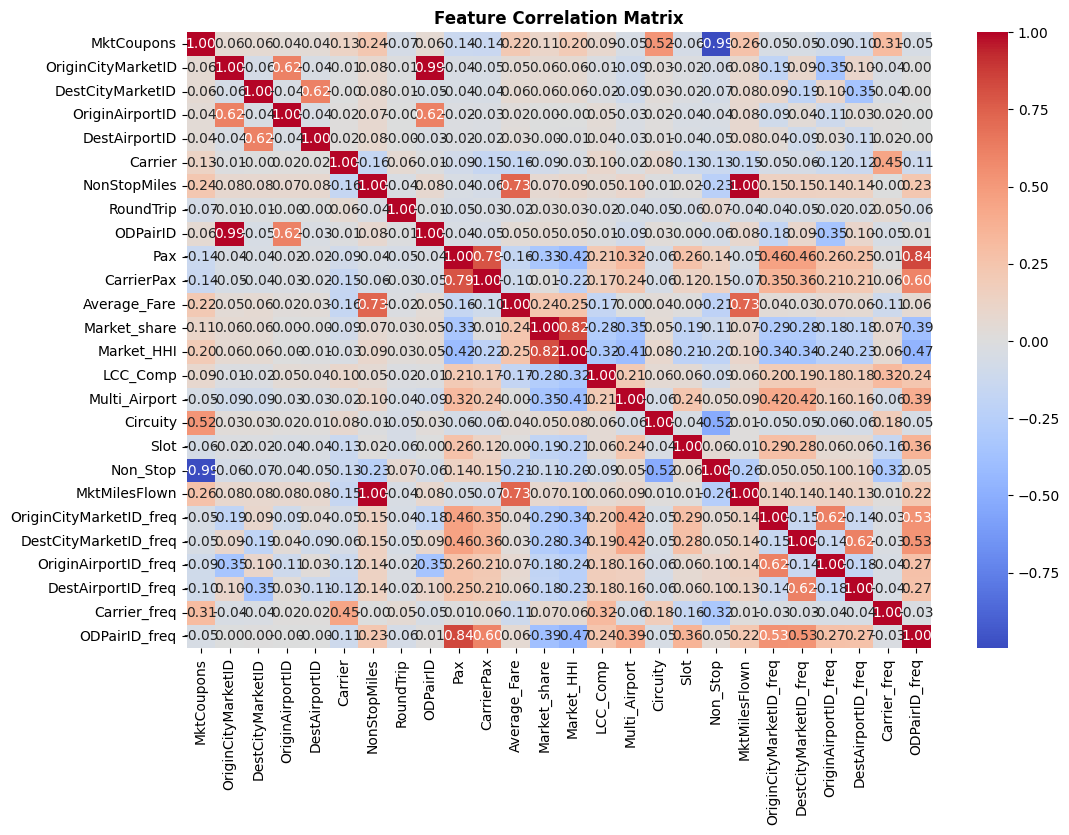

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix", fontweight='bold')
plt.show()

In [7]:
# Create a copy of the dataset
flights_processed = df.copy()

# Handle missing values if any
flights_processed.dropna(inplace=True)

# Split features and target variable
X = flights_processed.drop("Average_Fare", axis=1)
y = flights_processed["Average_Fare"]

# Feature scaling. The resulting features will have a mean 0 and a variance 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

The mean fare price is  214.4830666334446
The standard deviation of the fare price is  73.37320109376054


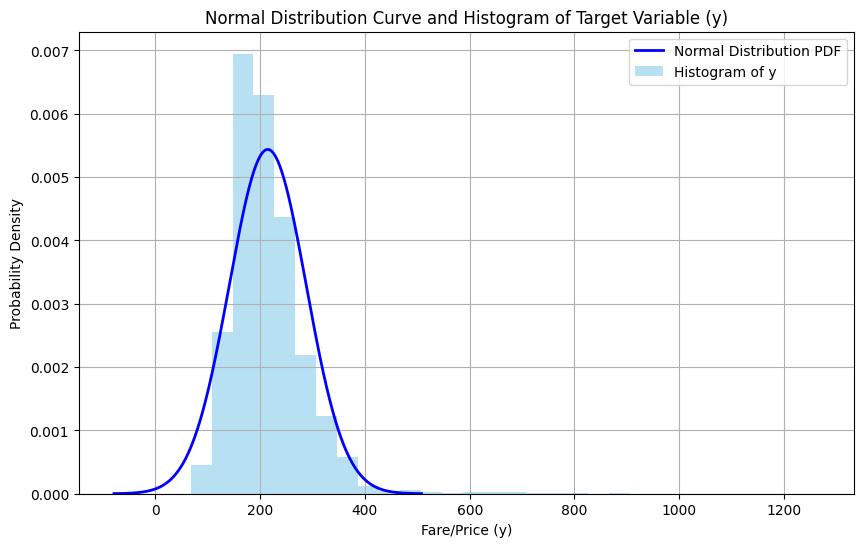

In [8]:
# Data properties
data = np.array(y)
mean_value = np.mean(data)
print("The mean fare price is ", mean_value)
print("The standard deviation of the fare price is ", np.std(data))

from scipy.stats import norm
data = np.array(y)
mean_value = np.mean(data)
std_dev = np.std(data)

x = np.linspace(mean_value - 4*std_dev, mean_value + 4*std_dev, 500)
pdf = norm.pdf(x, loc=mean_value, scale=std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', linewidth=2, label='Normal Distribution PDF')
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram of y')
plt.title('Normal Distribution Curve and Histogram of Target Variable (y)')
plt.xlabel('Fare/Price (y)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1265022, 25)
Testing set size: (316256, 25)


In [10]:
# # Reshape x for sklearn compatibility
# X = x.reshape(-1, 1)

# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.scatter(x, y, alpha=0.7, label='Data Points')
# plt.plot(x, y_true, 'r--', label='True Function')
# plt.title('Synthetic Nonlinear Data')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

In [11]:
# def calculate_weights(x, query_point, tau):
#     """
#     Calculate the weights for each training example based on the query point.

#     Args:
#         x: Training feature matrix (NumPy array or pandas DataFrame)
#         query_point: Single test point
#         tau: Bandwidth parameter

#     Returns:
#         Diagonal weight matrix (NumPy array)
#     """
#     # Ensure inputs are NumPy arrays
#     x = np.asarray(x)
#     query_point = np.asarray(query_point)

#     # Compute squared distances
#     distances = np.sum((x - query_point) ** 2, axis=1)
#     weights = np.exp(-distances / (2 * tau ** 2))

#     return np.diag(weights)

def calculate_weights(x, query_point, tau):
    x = np.asarray(x)
    query_point = np.asarray(query_point)
    distances = np.sum((x - query_point) ** 2, axis=1)
    weights = np.exp(-distances / (2 * tau ** 2))
    return weights  # Just return the weight vector


# def locally_weighted_regression(x, y, query_point, tau):
#     """
#     Make a prediction at query_point using locally weighted regression.

#     Args:
#         x: Training data features (n_samples, n_features)
#         y: Training data targets (n_samples,)
#         query_point: Point at which to make prediction
#         tau: Bandwidth parameter

#     Returns:
#         Predicted y value at query_point
#     """
#     # Add bias term (intercept)
#     x_b = np.c_[np.ones(len(x)), x]

#     # Calculate weights for this query point
#     W = calculate_weights(x, query_point, tau)

#     # Calculate parameters using normal equation with weights:
#     # θ = (X^T * W * X)^(-1) * X^T * W * y
#     xTWx = x_b.T @ W @ x_b
#     xTWy = x_b.T @ W @ y

#     # Compute the parameters (beta) using the normal equation
#     try:
#         beta = np.linalg.inv(xTWx) @ xTWy
#     except np.linalg.LinAlgError:
#         # If matrix is singular, use pseudo-inverse
#         beta = np.linalg.pinv(xTWx) @ xTWy

#     # Prepare query point with bias term
#     query_point_b = np.insert(query_point, 0, 1)

#     # Make prediction
#     prediction = query_point_b @ beta

#     return prediction

def locally_weighted_regression(x, y, query_point, tau):
    x = np.asarray(x)
    y = np.asarray(y)
    query_point = np.asarray(query_point)

    # Add bias term
    x_b = np.c_[np.ones(len(x)), x]
    query_point_b = np.insert(query_point, 0, 1)

    # Compute weight vector (not matrix)
    weights = calculate_weights(x, query_point, tau)

    # Weighted linear regression using vector weights
    # Efficient computation: W is applied to each row via broadcasting
    XTW = x_b.T * weights  # (features x samples)
    xTWx = XTW @ x_b        # (features x features)
    xTWy = XTW @ y          # (features,)

    try:
        beta = np.linalg.solve(xTWx, xTWy)
    except np.linalg.LinAlgError:
        beta = np.linalg.pinv(xTWx) @ xTWy

    return query_point_b @ beta


def predict_lwlr(x_train, y_train, x_test, tau):
    """
    Make predictions for each test point using LWLR.

    Args:
        x_train: Training features (NumPy array or pandas DataFrame)
        y_train: Training targets
        x_test: Test features (NumPy array or pandas DataFrame)
        tau: Bandwidth parameter

    Returns:
        Array of predictions
    """
    y_pred = np.zeros(len(x_test))

    for i in range(len(x_test)):
        if isinstance(x_test, pd.DataFrame):
            x_i = x_test.iloc[i].values  # convert row to NumPy array
        else:
            x_i = x_test[i]
        y_pred[i] = locally_weighted_regression(x_train, y_train, x_i, tau)

    return y_pred

Sampled MSE (tau=0.01): 0.0000


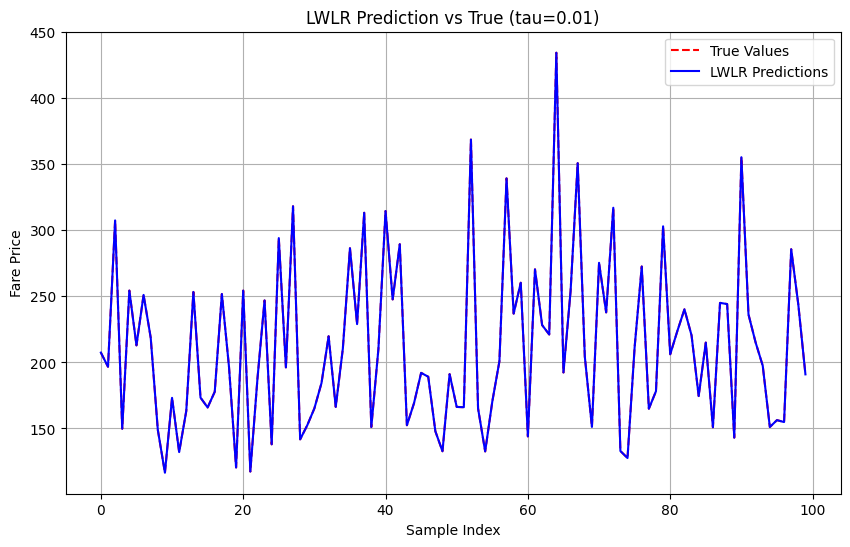

In [15]:
# # Subsample test data to make LWLR feasible
# sample_idx = np.linspace(0, len(X_test) - 1, 100, dtype=int)
# X_test_sample = X_test.iloc[sample_idx]
# y_test_sample = y_test.iloc[sample_idx]

# # Set bandwidth parameter
# tau = 0.01

# # Run LWLR on the sample
# y_pred_lwlr = predict_lwlr(X_train, y_train, X_test_sample, tau)

# # Calculate Mean Squared Error
# mse_lwlr = mean_squared_error(y_test_sample, y_pred_lwlr)
# print(f"Sampled MSE (tau={tau}): {mse_lwlr:.4f}")

# plt.figure(figsize=(10, 6))
# plt.plot(range(len(y_test_sample)), y_test_sample.values, 'r--', label='True Values')
# plt.plot(range(len(y_pred_lwlr)), y_pred_lwlr, 'b-', label='LWLR Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Fare Price')
# plt.title(f'LWLR Prediction vs True (tau={tau})')
# plt.legend()
# plt.grid(True)
# plt.show()

# # # Plot
# # plt.subplot(2, 2, i+1)
# # plt.scatter(x, y, alpha=0.7, label='Data Points')
# # plt.plot(x, y_true, 'r--', label='True Function')
# # plt.plot(x, y_pred_lwlr, 'b-', linewidth=2, label=f'LWLR (tau={tau})')
# # plt.title(f'LWLR with tau={tau}, MSE={mse_lwlr:.4f}')
# # plt.xlabel('x')
# # plt.ylabel('y')
# # plt.legend()
# # plt.grid(True, alpha=0.3)

tau = 0.1, MSE = 0.0000
tau = 0.5, MSE = 0.0925
tau = 1.0, MSE = 128.9871
tau = 5.0, MSE = 1409.7192


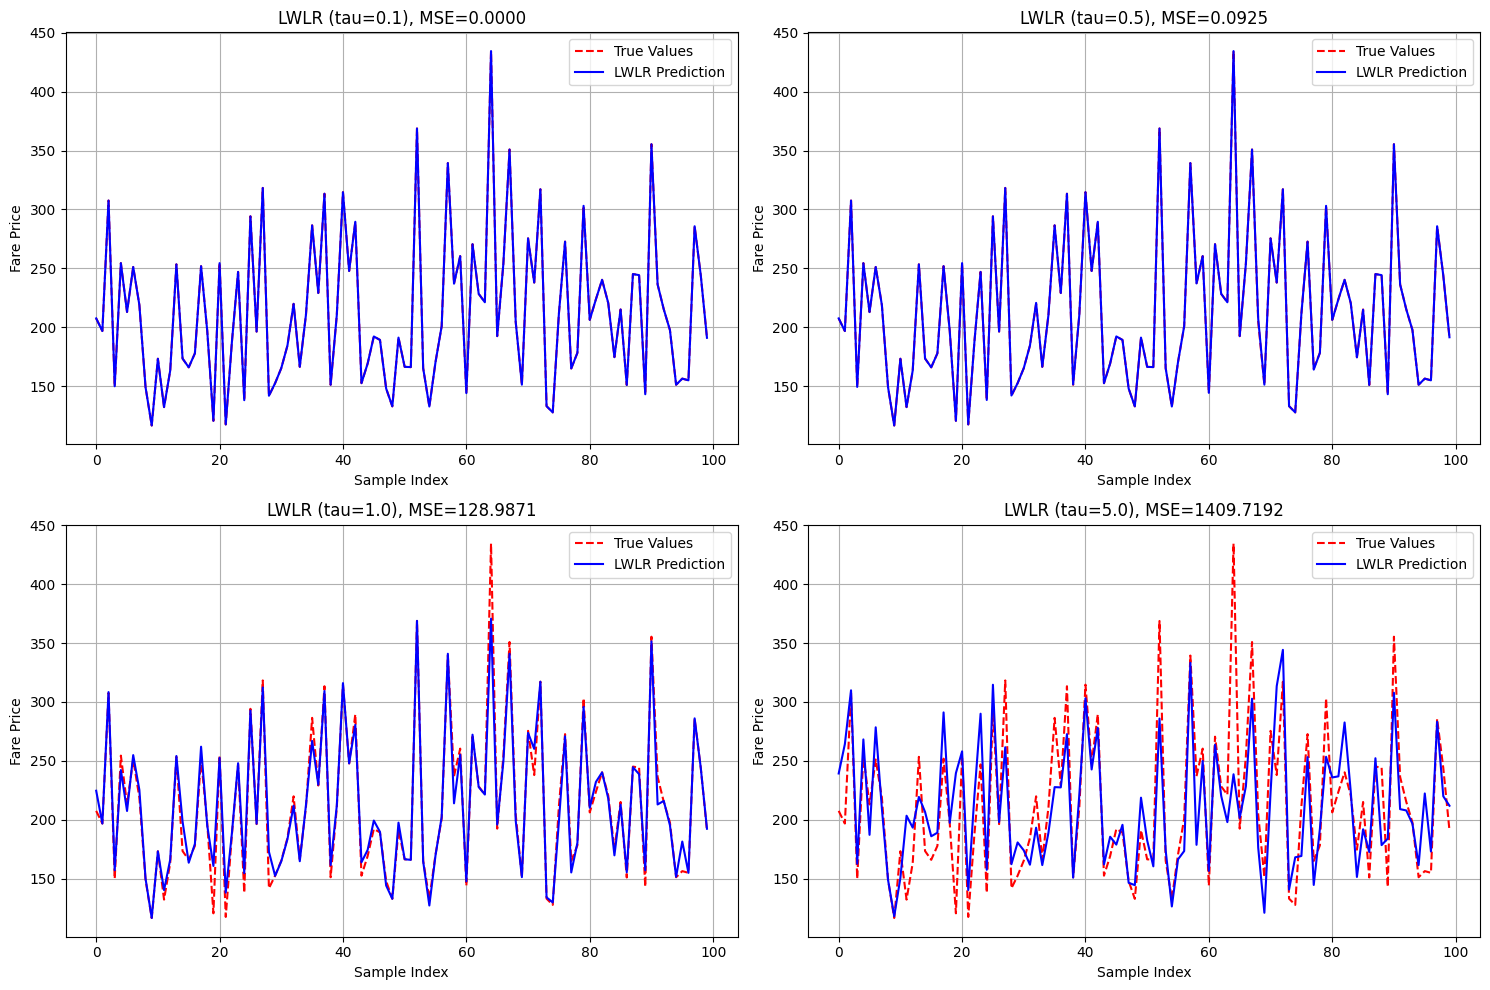

In [16]:
# Define tau values to test
tau_values = [0.1, 0.5, 1.0, 5.0]

# Subsample test set to keep memory usage low
sample_idx = np.linspace(0, len(X_test) - 1, 100, dtype=int)
X_test_sample = X_test.iloc[sample_idx]
y_test_sample = y_test.iloc[sample_idx]

# Set up the plot
plt.figure(figsize=(15, 10))

for i, tau in enumerate(tau_values):
    # Predict using LWLR
    y_pred_lwlr = predict_lwlr(X_train, y_train, X_test_sample, tau)

    # Calculate MSE
    mse_lwlr = mean_squared_error(y_test_sample, y_pred_lwlr)
    print(f"tau = {tau}, MSE = {mse_lwlr:.4f}")

    # Plot predictions vs true values
    plt.subplot(2, 2, i + 1)
    plt.plot(range(len(y_test_sample)), y_test_sample.values, 'r--', label='True Values')
    plt.plot(range(len(y_pred_lwlr)), y_pred_lwlr, 'b-', label='LWLR Prediction')
    plt.title(f'LWLR (tau={tau}), MSE={mse_lwlr:.4f}')
    plt.xlabel('Sample Index')
    plt.ylabel('Fare Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Evaluating different tau values...
tau = 0.1000, MSE = 0.0000
tau = 0.1274, MSE = 0.0000
tau = 0.1624, MSE = 0.0000
tau = 0.2069, MSE = 0.0000
tau = 0.2637, MSE = 0.0000
tau = 0.3360, MSE = 0.0000
tau = 0.4281, MSE = 0.0039
tau = 0.5456, MSE = 0.3012
tau = 0.6952, MSE = 3.4416
tau = 0.8859, MSE = 46.5635
tau = 1.1288, MSE = 264.8741
tau = 1.4384, MSE = 630.4645
tau = 1.8330, MSE = 1006.4990
tau = 2.3357, MSE = 1237.7618
tau = 2.9764, MSE = 1337.0088
tau = 3.7927, MSE = 1380.9327
tau = 4.8329, MSE = 1406.7108
tau = 6.1585, MSE = 1426.1290
tau = 7.8476, MSE = 1441.2903
tau = 10.0000, MSE = 1452.4873


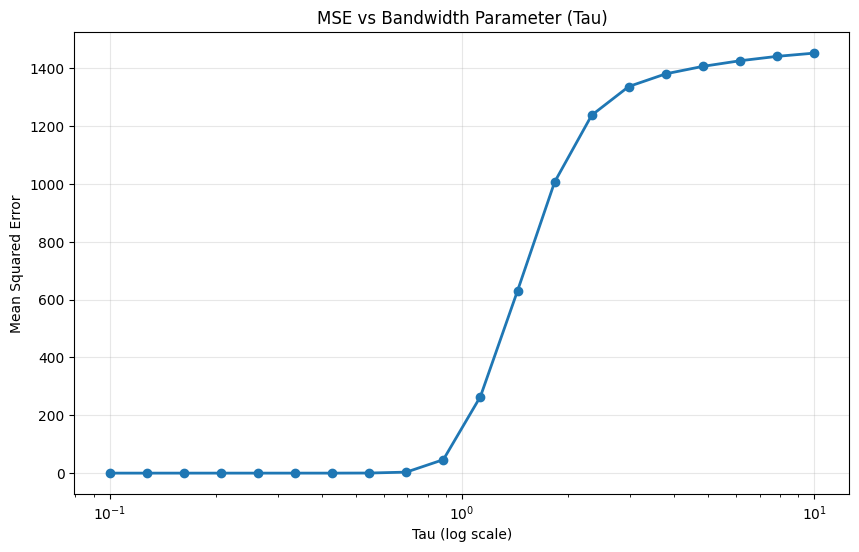


Optimal tau value: 0.1000 with MSE: 0.0000


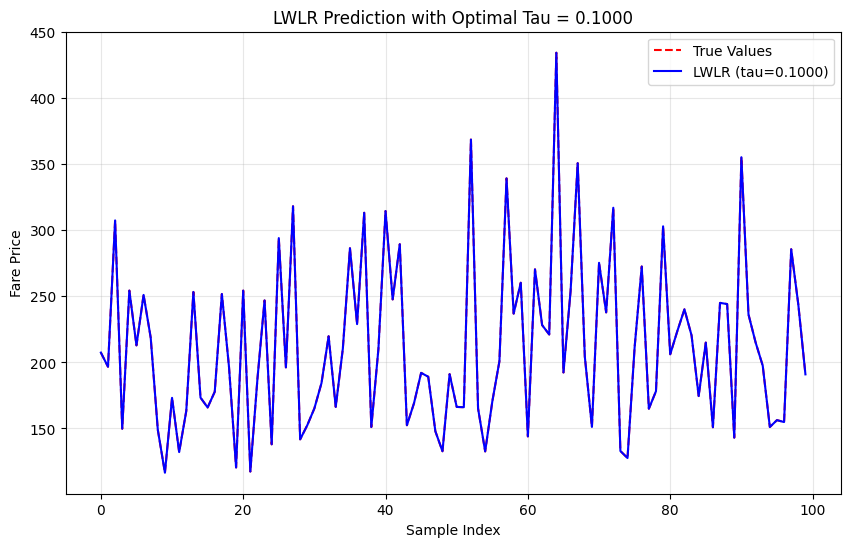

In [17]:
# Try a wider range of tau values (log scale)
tau_range = np.logspace(-1, 1, 20)  # 0.1 to 10
mse_values = []

# Use a small test sample to reduce memory cost
sample_idx = np.linspace(0, len(X_test) - 1, 100, dtype=int)
X_test_sample = X_test.iloc[sample_idx]
y_test_sample = y_test.iloc[sample_idx]

print("Evaluating different tau values...")
for tau in tau_range:
    y_pred = predict_lwlr(X_train, y_train, X_test_sample, tau)
    mse = mean_squared_error(y_test_sample, y_pred)
    mse_values.append(mse)
    print(f"tau = {tau:.4f}, MSE = {mse:.4f}")

# Plot MSE vs tau
plt.figure(figsize=(10, 6))
plt.semilogx(tau_range, mse_values, 'o-', linewidth=2)
plt.xlabel('Tau (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Bandwidth Parameter (Tau)')
plt.grid(True, alpha=0.3)
plt.show()

# Find and print optimal tau
optimal_tau_idx = np.argmin(mse_values)
optimal_tau = tau_range[optimal_tau_idx]
print(f"\nOptimal tau value: {optimal_tau:.4f} with MSE: {mse_values[optimal_tau_idx]:.4f}")

# Predict with optimal tau
y_pred_optimal = predict_lwlr(X_train, y_train, X_test_sample, optimal_tau)

# Plot prediction vs true values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_sample)), y_test_sample.values, 'r--', label='True Values')
plt.plot(range(len(y_pred_optimal)), y_pred_optimal, 'b-', label=f'LWLR (tau={optimal_tau:.4f})')
plt.title(f'LWLR Prediction with Optimal Tau = {optimal_tau:.4f}')
plt.xlabel('Sample Index')
plt.ylabel('Fare Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


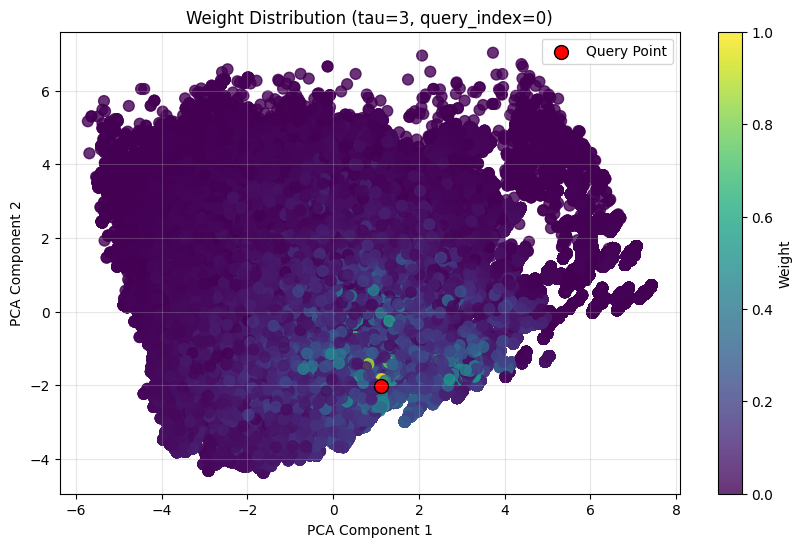

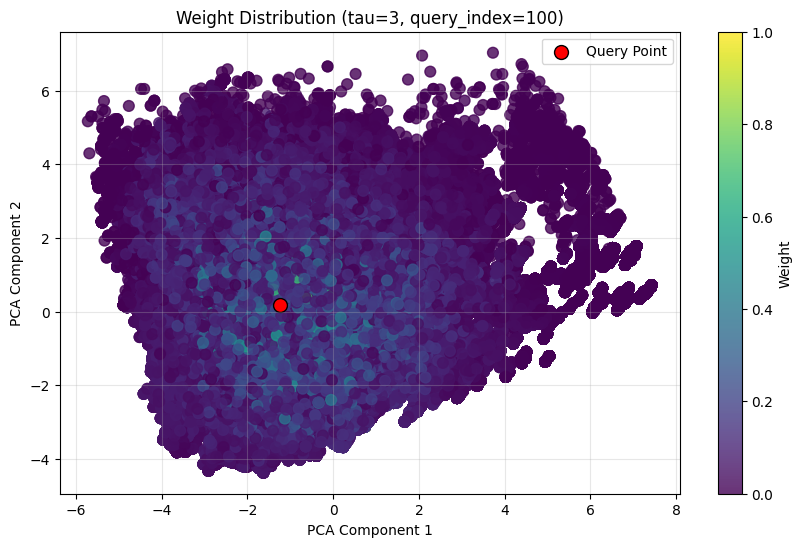

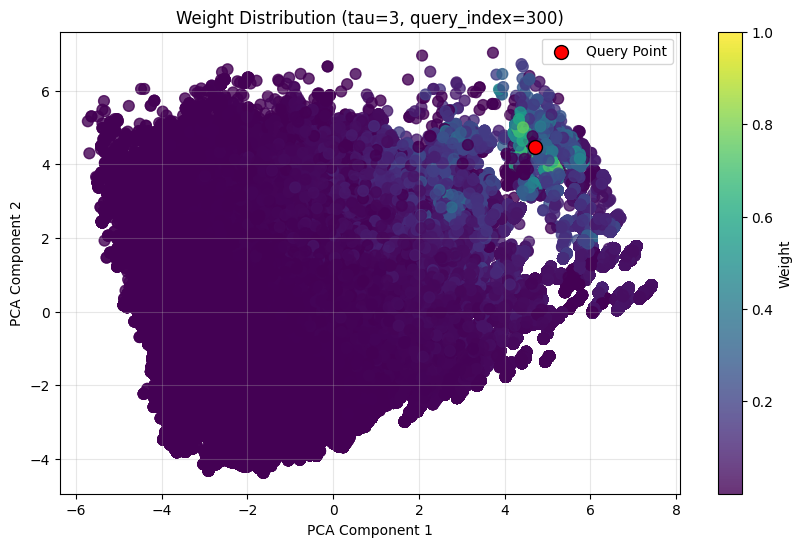

In [21]:
def plot_weight_distribution_multifeature(X, y, query_index, tau):
    """
    Plot the weight distribution for a multivariate query point using the first 2 PCA components.

    Args:
        X: Feature matrix (pandas DataFrame or NumPy array)
        y: Target values
        query_index: Index of the query point (int)
        tau: Bandwidth parameter
    """
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    # Get the query point
    if isinstance(X, pd.DataFrame):
        query_point = X.iloc[query_index].values
        X_array = X.values
    else:
        query_point = X[query_index]
        X_array = X

    # Compute weights
    distances = np.sum((X_array - query_point) ** 2, axis=1)
    weights = np.exp(-distances / (2 * tau ** 2))

    # Reduce dimensions for visualization (PCA to 2D)
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X_array)

    # Plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=weights, cmap='viridis', s=60, alpha=0.8)
    plt.colorbar(scatter, label='Weight')
    plt.scatter(X_2d[query_index, 0], X_2d[query_index, 1], color='red', edgecolors='black', label='Query Point', s=100)
    plt.title(f'Weight Distribution (tau={tau}, query_index={query_index})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Choose a few indices to visualize
query_indices = [0, 100, 300]
example_tau = 3

for idx in query_indices:
    plot_weight_distribution_multifeature(X_train, y_train, idx, example_tau)